<a href="https://colab.research.google.com/github/srimanthtenneti/Autoencoders/blob/main/Linear_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as f

import torchvision
import torchvision.transforms as transforms

from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt

In [42]:
data_trasnform = transforms.ToTensor()

In [43]:
dataset = torchvision.datasets.MNIST('./root' , transform = data_trasnform , download = True , train = True)
testset = torchvision.datasets.MNIST('./root' , transform = data_trasnform , download = True , train = False)

In [44]:
batchsize   = 25
num_workers = 0 

In [45]:
trainloader = DataLoader(dataset , shuffle = True , batch_size = batchsize , num_workers = num_workers)
testloader  = DataLoader(testset , shuffle = True , batch_size = batchsize , num_workers = num_workers)

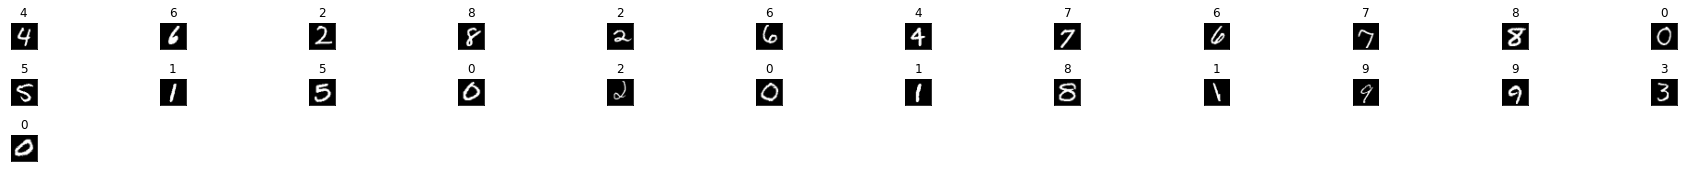

In [46]:
images , labels = iter(trainloader).next()
images = images.numpy()
fig = plt.figure(figsize = (25,4))

for i in range(batchsize):
  ax = fig.add_subplot(5 , batchsize / 2 , i + 1 , xticks = [] , yticks = [])
  ax.imshow(np.squeeze(images[i]) , cmap = 'gray')
  ax.set_title(labels[i].item())

plt.tight_layout()


In [47]:
class linear_autoencoder(nn.Module):
  def __init__(self,input_dims,n_dims = 32):
    super(linear_autoencoder , self).__init__()
    self.input_dims = input_dims
    self.n_dims = n_dims

    self.in_linear  = nn.Linear(input_dims , n_dims) # Encoding
    self.out_linear = nn.Linear(n_dims , input_dims) # Decoding

  def forward(self , x):
    x = self.in_linear(x)
    x = f.sigmoid(self.out_linear(x))
    return x 


In [48]:
model = linear_autoencoder(784 , 256)
print(model)

linear_autoencoder(
  (in_linear): Linear(in_features=784, out_features=256, bias=True)
  (out_linear): Linear(in_features=256, out_features=784, bias=True)
)


In [49]:
# specify loss function
criterion = nn.MSELoss()

# specify loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [50]:
def train(n_epochs , model):
  training_loss = []

  for epoch in range(n_epochs):
    trainloss = 0.0
    for batch_i , (images , labels) in enumerate(trainloader):
      optimizer.zero_grad()
      images = images.view(images.size(0), -1)
      output = model(images)
      loss = criterion(output , images) # Here we comapre with the image itself insted of the label
      loss.backward()
      optimizer.step()
      trainloss += loss.item()  
    print("Epoch: {} , Batch: {} , Training Loss: {}".format(epoch + 1 , batch_i + 1 , trainloss / len(trainloader)))
    training_loss.append(trainloss)
        
  print("Training Completed !!!")

In [51]:
def plot_images(model):

  images , labels = iter(testloader).next()
  preds = model(images.view(images.size(0) , -1))
  images = images.numpy()

  fig1 = plt.figure(figsize = (25,4))
  fig2 = plt.figure(figsize = (25,4))

  for i in range(batchsize):
    ax1 = fig2.add_subplot(2 , batchsize / 1 , i + 1 , xticks = [] , yticks = [])
    ax1.imshow(np.squeeze(images[i]) , cmap = 'gray')
    ax1.set_title(labels[i].item())

  for i in range(batchsize):
    ax = fig1.add_subplot(2 , batchsize / 1 , i + 1 , xticks = [] , yticks = [])
    ax.imshow(preds[i].detach().numpy().reshape(28 , 28) , cmap = 'gray')
    ax.set_title("d_"+str(labels[i].item()))

  plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 1 , Batch: 2400 , Training Loss: 0.0115894075538381
Epoch: 2 , Batch: 2400 , Training Loss: 0.0019333008722848414
Epoch: 3 , Batch: 2400 , Training Loss: 0.001317808320382028
Epoch: 4 , Batch: 2400 , Training Loss: 0.001086204940584139
Epoch: 5 , Batch: 2400 , Training Loss: 0.0009723953964324512
Training Completed !!!


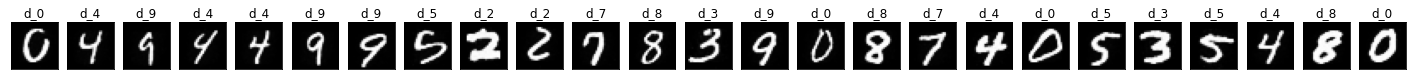

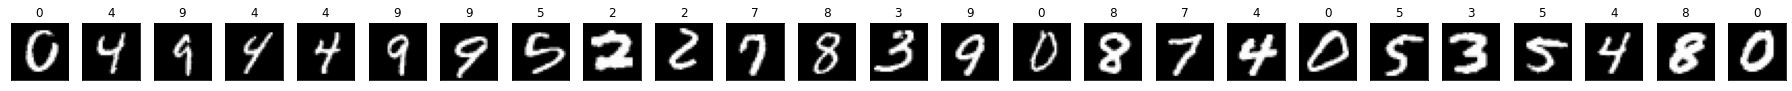

In [52]:
train(5 , model)
plot_images(model)